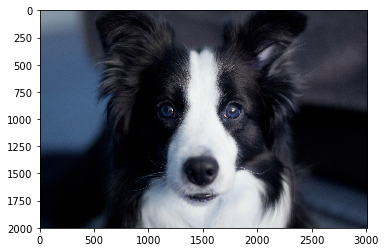

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('Imagenes/doge.jpg')
plt.imshow(img)

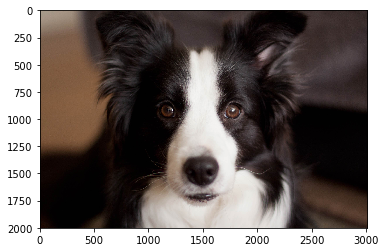

In [100]:
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

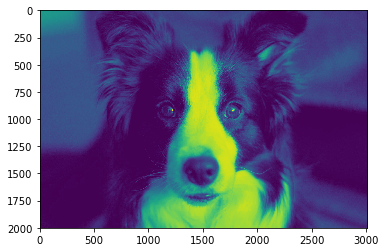

In [27]:
# 1. Muestren solo el canal azul de la figura 
pic_blue = fix_img.copy()
plt.imshow(pic_blue[:,:,2])

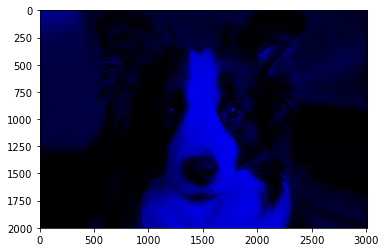

In [23]:
pic_blue[:,:,0]=0
pic_blue[:,:,1]=0

plt.imshow(pic_blue)

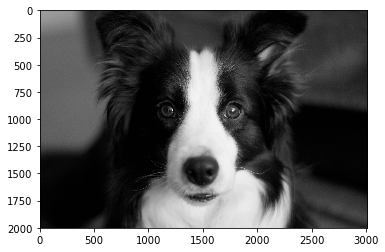

In [42]:
# 2. Cambien la imagen a escala de grises
fix_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(fix_gray, cmap = 'gray')

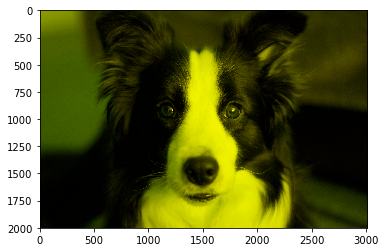

In [91]:
# 3. Creen una nueva imagen que contenga solo los canales rojo y verde
pic_green_red = img.copy()
pic_green_red[:,:,2] = 0
plt.imshow(pic_green_red)

True

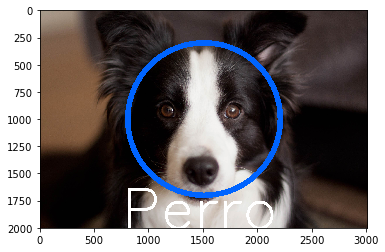

In [127]:
# 4. Dibujen un círculo sobre las caras de dicha figura y agreguen un texto que describa que es (persona, perro, gato), luego guarden la figura con los círculos dibujados y el texto generado
# agrega circulo
img_copy = fix_img.copy()
y = int(len(img_copy)/2)
x = int(len(img_copy[0])/2)

circle = cv2.circle(img_copy, (x, y), 700, (0, 100, 255), 50)

# agrega texto
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(circle, 'Perro', (750, len(img_copy)), font, 17, (255, 255, 255), 25, cv2.LINE_AA)
plt.imshow(text)

# guarda imagen
restore_color_img = cv2.cvtColor(text, cv2.COLOR_RGB2BGR)
cv2.imwrite('exercise04.jpg', restore_color_img)


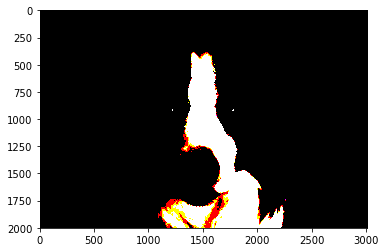

In [150]:
# 5. Apliquen un umbral binario (binary threshold) a la imagen.
binary_threshold = fix_img.copy()
ret, binary_threshold = cv2.threshold(binary_threshold, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary_threshold)

In [ ]:
# 6. Creen un programa que permita dibujar diferentes tipos de figuras geométricas con el uso de eventos de mouse y teclados para poder hacer dibujos y luego guardar la imagen.
import cv2
import numpy as np
import math

drawing = False  # Controla si el mouse está presionado
mode = 'line'  # Modo actual de dibujo: 'line', 'rectangle', 'circle', 'ellipse'
start_point = (-1, -1)  # Punto inicial para el dibujo
color = (0, 0, 0)  # Color
thickness = 2  # Grosor
window_name = "Painter SS"

def draw_shape(event, x, y, flags, param):
    global drawing, start_point, mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = (x, y)
    # Muestra lo que se va dibujando
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_temp = img.copy()
            if mode == 'line':
                cv2.line(img_temp, start_point, (x, y), color, thickness)
            elif mode == 'rectangle':
                cv2.rectangle(img_temp, start_point, (x, y), color, thickness)
            elif mode == 'circle':
                radius = int(math.hypot(x - start_point[0], y - start_point[1]))
                cv2.circle(img_temp, start_point, radius, color, thickness)
            elif mode == 'ellipse':
                axis_lengths = (abs(x - start_point[0]), abs(y - start_point[1]))
                cv2.ellipse(img_temp, start_point, axis_lengths, 0, 0, 360, color, thickness)
            cv2.imshow(window_name, img_temp)
    # Al dejar de presionar dibuja en la imagen verdadera
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == 'line':
            cv2.line(img, start_point, (x, y), color, thickness)
        elif mode == 'rectangle':
            cv2.rectangle(img, start_point, (x, y), color, thickness)
        elif mode == 'circle':
            radius = int(math.hypot(x - start_point[0], y - start_point[1]))
            cv2.circle(img, start_point, radius, color, thickness)
        elif mode == 'ellipse':
            axis_lengths = (abs(x - start_point[0]), abs(y - start_point[1]))
            cv2.ellipse(img, start_point, axis_lengths, 0, 0, 360, color, thickness)
        cv2.imshow(window_name, img)

def change_color():
    global color
    # black, blue, green, red
    colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]
    index = colors.index(color)
    color = colors[(index + 1) % len(colors)]
    
def change_mode(key):
    global mode
    if key == ord('l'):
        mode = 'line'
    elif key == ord('r'):
        mode = 'rectangle'
    elif key == ord('c'):
        mode = 'circle'
    elif key == ord('e'):
        mode = 'ellipse'

# Crear una imagen en blanco
img = np.full((512, 512, 3), 255, np.uint8)

# Crear la ventana
cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name, draw_shape)
cv2.imshow(window_name, img)

while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27: # escape para salir
        break
    elif key == ord('s'):  # para guardar la imagen
        cv2.imwrite('draw.png', img)
    elif key == ord('u'):
        change_color()
    else:
        change_mode(key)

cv2.destroyAllWindows()